In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
pip install pillow-heif

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5210 - loss: 1.2500 - val_accuracy: 0.4091 - val_loss: 0.7435
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4773 - loss: 0.7993 - val_accuracy: 0.5909 - val_loss: 0.6745
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5575 - loss: 0.7201 - val_accuracy: 0.5909 - val_loss: 0.6755
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6136 - loss: 0.6967 - val_accuracy: 0.5909 - val_loss: 0.6799
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5994 - loss: 0.6812 - val_accuracy: 0.6364 - val_loss: 0.6837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7198 - loss: 0.6413 - val_accuracy: 0.6818 - val_loss: 0.6799
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6168 - loss: 0.6491 - val_accuracy: 0.6818 - val_loss: 0.6663
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6594 - loss: 0.6429 - val_accuracy: 0.5909 - val_loss: 0.6448
E

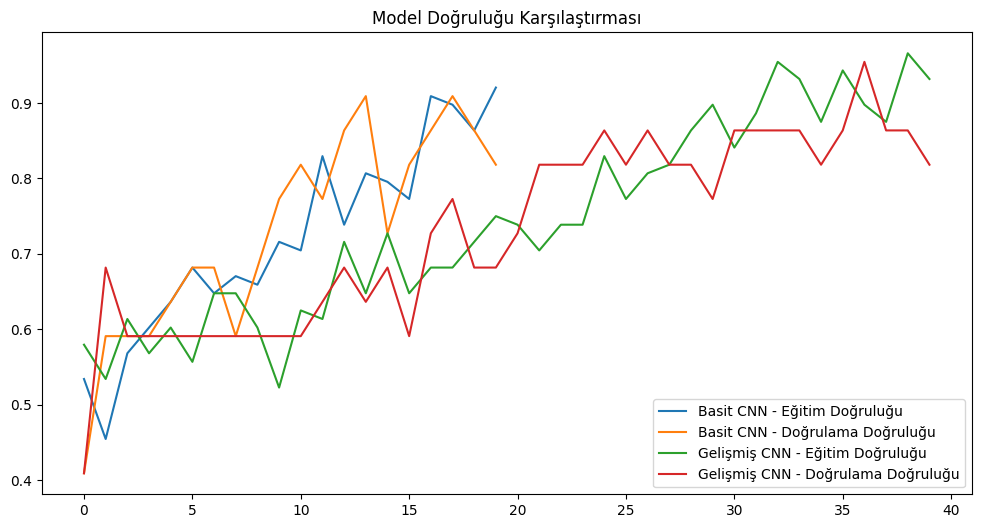


Tahminler (Basit CNN):

Examples klasöründeki tahminler:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
example_0.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
example_1.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
example_2.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
example_3.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
example_4.HEIC: Tahmin edilen sınıf -> direction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
example_5.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
example_6.HEIC: Tahmin edilen sınıf -> number

Tahminler (Gelişmiş CNN):

Examples klasöründeki tahminler:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
example_0.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
example_1.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
example_2.HEIC: Tahmin edilen sınıf -> number
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

In [38]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pillow_heif import register_heif_opener
from tensorflow.keras.preprocessing.image import img_to_array

register_heif_opener()


data_dir = "/content/drive/My Drive/dataset"
examples_dir = "/content/drive/My Drive/examples"
img_size = (64, 64)
num_classes = 2

# Classification
number_classes = {"1", "2", "3"}
direction_classes = {"up", "down", "left", "right"}

# Load Dataset
def load_dataset(data_dir, img_size):
    X, y = [], []
    classes = sorted(os.listdir(data_dir))

    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        label = 0 if class_name in number_classes else 1  # "number" -> 0, "direction" -> 1 classification number

        for img_name in os.listdir(class_dir):
            if img_name.endswith(".HEIC"):
                img_path = os.path.join(class_dir, img_name)
                try:
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(img_size)
                    img_array = img_to_array(img) / 255.0
                    X.append(img_array)
                    y.append(label)
                except Exception as e:
                    print(f"Görüntü işlenemedi: {img_path}. Hata: {e}")

    return np.array(X), np.array(y), ["number", "direction"]

# Basit CNN Model
def create_simple_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Adv CNN Model
def create_advanced_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.6),

        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.6),
        Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Examples Predict Function
def predict_examples(model, examples_dir, class_names, img_size):
    print("\nExamples klasöründeki tahminler:")
    for img_name in sorted(os.listdir(examples_dir)):
        if img_name.endswith(".HEIC"):
            img_path = os.path.join(examples_dir, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                img_array = img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                predictions = model.predict(img_array)
                predicted_class = class_names[np.argmax(predictions)]
                print(f"{img_name}: Tahmin edilen sınıf -> {predicted_class}")
            except Exception as e:
                print(f"Görüntü işlenemedi: {img_path}. Hata: {e}")

# Load Dataset
X, y, class_names = load_dataset(data_dir, img_size)
y = to_categorical(y, num_classes=num_classes)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic CNN Model Training
simple_model = create_simple_model(input_shape=(img_size[0], img_size[1], 3), num_classes=num_classes)
simple_history = simple_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Adv CNN Model Training
advanced_model = create_advanced_model(input_shape=(img_size[0], img_size[1], 3), num_classes=num_classes)
advanced_history = advanced_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32)

# Comprassion CNN Models
plt.figure(figsize=(12, 6))
plt.plot(simple_history.history["accuracy"], label="Basit CNN - Eğitim Doğruluğu")
plt.plot(simple_history.history["val_accuracy"], label="Basit CNN - Doğrulama Doğruluğu")
plt.plot(advanced_history.history["accuracy"], label="Gelişmiş CNN - Eğitim Doğruluğu")
plt.plot(advanced_history.history["val_accuracy"], label="Gelişmiş CNN - Doğrulama Doğruluğu")
plt.legend()
plt.title("Model Doğruluğu Karşılaştırması")
plt.show()

# Examples Predict
print("\nTahminler (Basit CNN):")
predict_examples(simple_model, examples_dir, class_names, img_size)

print("\nTahminler (Gelişmiş CNN):")
predict_examples(advanced_model, examples_dir, class_names, img_size)